In [1]:
import pandas as pd
import geopandas
import numpy as np

In [2]:
municipalities = geopandas.read_file("/Users/jaydenfont/Desktop/Code/Spark/ACLU/CENSUS2010TOWNS_SHP/CENSUS2010TOWNS_POLY.shp", encoding="utf-8")
municipalities

,TOWN_ID,TOWN,TOWN2,COUSUBFP10,FIPS_STCO,COUNTY,POP1980,POP1990,POP2000,POP2010,...,POPCH90_00,POPCH00_10,HU2010,FOURCOLOR,TYPE,AREA_ACRES,SQ_MILES,SHAPE_AREA,SHAPE_LEN,geometry
0,104,AQUINNAH,Aquinnah,01585,25007,DUKES,184,201,344,311,...,143,-33,503,2,T,3692.2775,5.769184,1.494218e+07,21309.359067,"POLYGON ((257628.027 789763.281, 257707.311 78..."
1,10,ARLINGTON,Arlington,01605,25017,MIDDLESEX,45640,44630,42389,42844,...,-2241,455,19974,1,T,3515.2120,5.492520,1.422562e+07,16917.260129,"POLYGON ((228132.056 909534.649, 228330.200 90..."
2,11,ASHBURNHAM,Ashburnham,01885,25027,WORCESTER,4406,5433,5546,6081,...,113,535,2599,2,T,26219.1444,40.967413,1.061055e+08,41796.414828,"POLYGON ((169429.862 937325.184, 169690.389 93..."
3,12,ASHBY,Ashby,01955,25017,MIDDLESEX,2562,2717,2845,3074,...,128,229,1191,1,T,15417.2476,24.089449,6.239164e+07,35369.083727,"POLYGON ((174978.588 939866.472, 175519.212 93..."
4,13,ASHFIELD,Ashfield,02095,25011,FRANKLIN,1502,1715,1800,1737,...,85,-63,877,2,T,25761.8934,40.252958,1.042551e+08,41137.881374,"POLYGON ((98731.227 924309.302, 98741.758 9243..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,320,WENHAM,Wenham,74595,25009,ESSEX,3798,4212,4440,4875,...,228,435,1430,3,T,5210.9264,8.142072,2.108795e+07,25522.692819,"POLYGON ((247690.450 930482.565, 247678.268 93..."
347,348,WORCESTER,Worcester,82000,25027,WORCESTER,159843,169759,172648,181045,...,2889,8397,74645,3,C,24609.9650,38.453068,9.959339e+07,42666.492249,"POLYGON ((179720.692 888171.158, 179722.828 88..."
348,349,WORTHINGTON,Worthington,82175,25015,HAMPSHIRE,1059,1156,1270,1156,...,114,-114,629,1,T,20538.7944,32.091866,8.311788e+07,45089.488746,"POLYGON ((84983.993 905797.532, 85032.015 9054..."
349,350,WRENTHAM,Wrentham,82315,25021,NORFOLK,8191,9006,10554,10955,...,1548,401,3869,3,T,14470.3211,22.609877,5.855955e+07,38517.020872,"POLYGON ((215276.036 871085.507, 215316.275 87..."


In [3]:
municipalities[["TOWN2", "TYPE"]].head(20)

,TOWN2,TYPE
0,Aquinnah,T
1,Arlington,T
2,Ashburnham,T
3,Ashby,T
4,Ashfield,T
5,Ashland,T
6,Athol,T
7,Attleboro,C
8,Auburn,T
9,Avon,T


In [4]:
def check_match(x, towns):
    if x in list(towns.departments):
        return float(towns[towns.departments == x].crime_discrepancy)
    else:
        return np.nan
    
def plot_map(municipalities, year):
    
    midsize = pd.read_excel("/Users/jaydenfont/Desktop/Code/Spark/ACLU/midsize_areas_ranking.xlsx", f"midsize_areas_ranking_{year}")
    urban = pd.read_excel("/Users/jaydenfont/Desktop/Code/Spark/ACLU/urban_areas_breakdown.xlsx", f"urban_areas_breakdown_{year}")
    merged = pd.concat([midsize, urban]).reset_index(drop=True)
    
    municipalities['discrepancy'] = municipalities.TOWN2.apply(check_match, args=(merged,))
    municipalities[['TOWN2', "discrepancy"]]
    
    map = municipalities.plot(column='discrepancy', figsize=(12, 9),
                    legend=True, legend_kwds={
                        "label": "Arrest Discrepancy",
                        "orientation": "horizontal"
                    }, edgecolor="black",
                   cmap="winter")
    map.set_title(f"Map of Arrest Discrepancies in MA by Municipality {year}")
    map.figure.savefig(f"Map_{year}")

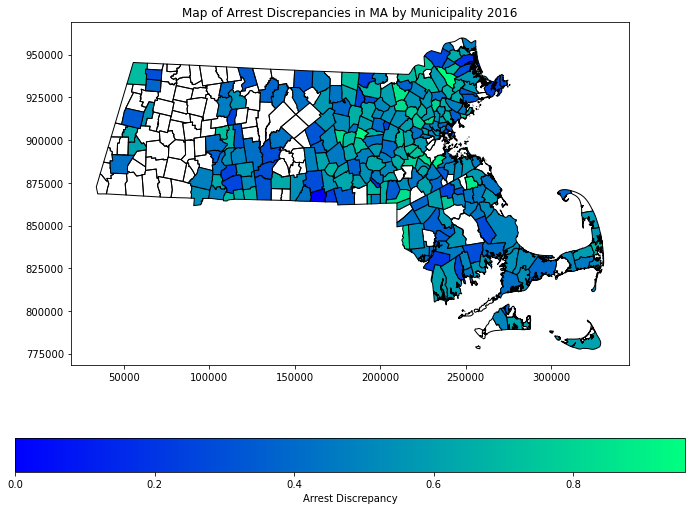

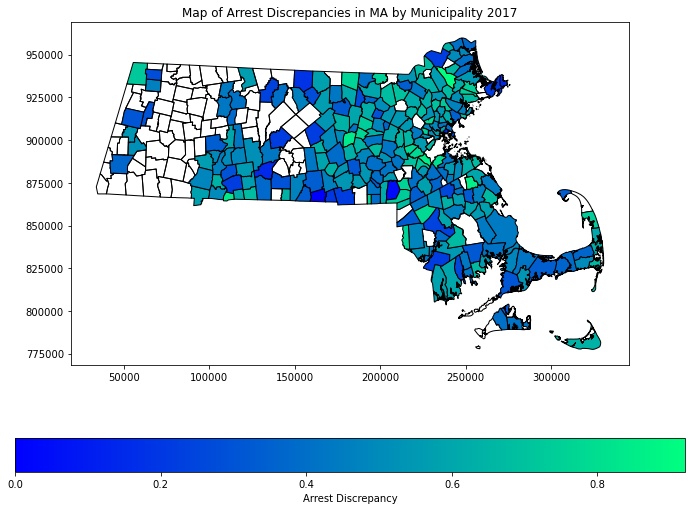

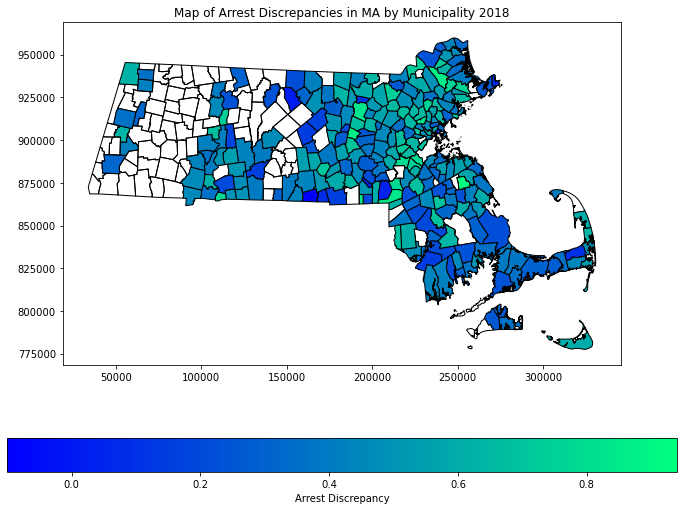

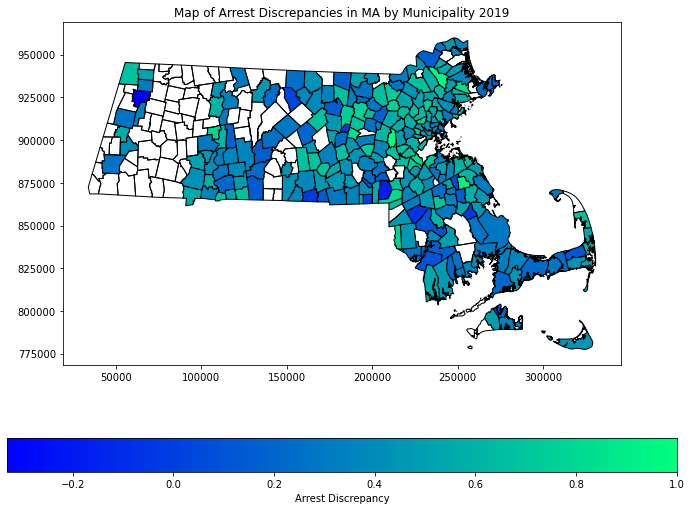

In [5]:
for i in range(2016, 2020):
    plot_map(municipalities, i)

In [6]:
all_years = []
for year in range(2016, 2020):
    midsize = pd.read_excel("/Users/jaydenfont/Desktop/Code/Spark/ACLU/midsize_areas_ranking.xlsx", f"midsize_areas_ranking_{year}")
    urban = pd.read_excel("/Users/jaydenfont/Desktop/Code/Spark/ACLU/urban_areas_breakdown.xlsx", f"urban_areas_breakdown_{year}")
    merged = pd.concat([midsize, urban]).reset_index(drop=True)
    all_years.append(merged)
all_years_merged = pd.concat(all_years)
year_groups = all_years_merged.groupby(by="year")

In [7]:
total_change = {"2016-2017": [], "2017-2018": [], "2018-2019": []}
percent_change = {"2016-2017": [], "2017-2018": [], "2018-2019": []}

for i in range(0, 3):
    if i == 0:
        y1 = year_groups.get_group(2016)
        y2 = year_groups.get_group(2017)
        for town in y2.departments:
            try:
                v1 = float(list(y1[y1.departments == town].crime_discrepancy)[0])
                v2 = float(list(y2[y2.departments == town].crime_discrepancy)[0])
                change = v2-v1
                total_change["2016-2017"].append(change)
                try:
                    percent_change["2016-2017"].append(100 * (change/v1))
                except ZeroDivisionError:
                    percent_change["2016-2017"].append(np.nan)
            except IndexError:
                total_change["2016-2017"].append(np.nan)
                percent_change["2016-2017"].append(np.nan)
    elif i == 1:
        y1 = year_groups.get_group(2017)
        y2 = year_groups.get_group(2018)
        for town in y2.departments:
            try:
                v1 = float(list(y1[y1.departments == town].crime_discrepancy)[0])
                v2 = float(list(y2[y2.departments == town].crime_discrepancy)[0])
                change = v2-v1
                total_change["2017-2018"].append(change)
                try:
                    percent_change["2017-2018"].append(100 * (change/v1))
                except ZeroDivisionError:
                    percent_change["2017-2018"].append(np.nan)
            except IndexError:
                total_change["2017-2018"].append(np.nan)
                percent_change["2017-2018"].append(np.nan)
    else:
        y1 = year_groups.get_group(2018)
        y2 = year_groups.get_group(2019)
        for town in y2.departments:
            try:
                v1 = float(list(y1[y1.departments == town].crime_discrepancy)[0])
                v2 = float(list(y2[y2.departments == town].crime_discrepancy)[0])
                change = v2-v1
                total_change["2018-2019"].append(change)
                try:
                    percent_change["2018-2019"].append(100 * (change/v1))
                except ZeroDivisionError:
                    percent_change["2018-2019"].append(np.nan)
            except IndexError:
                total_change["2018-2019"].append(np.nan)
                percent_change["2018-2019"].append(np.nan)



In [8]:
for year in range(2017, 2020):
    midsize = pd.read_excel("/Users/jaydenfont/Desktop/Code/Spark/ACLU/midsize_areas_ranking.xlsx", f"midsize_areas_ranking_{year}")
    urban = pd.read_excel("/Users/jaydenfont/Desktop/Code/Spark/ACLU/urban_areas_breakdown.xlsx", f"urban_areas_breakdown_{year}")
    merged = pd.concat([midsize, urban]).reset_index(drop=True)
    if year == 2017:
        merged["total_change_2016-2017"] = total_change["2016-2017"]
        merged["pct_change_2016-2017"] = percent_change["2016-2017"]
    elif year == 2018:
        merged["total_change_2017-2018"] = total_change["2017-2018"]
        merged["pct_change_2017-2018"] = percent_change["2017-2018"]
    else:
        merged["total_change_2018-2019"] = total_change["2018-2019"]
        merged["pct_change_2018-2019"] = percent_change["2018-2019"]
    merged.to_excel(f"data_with_pct_change_{year}.xlsx", index=False)